In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import chi2_contingency

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

In [2]:
df=pd.read_csv('Train.csv')
df.head()

,id,realtionship_status,industry,genre,targeted_sex,average_runtime(minutes_per_week),airtime,airlocation,ratings,expensive,money_back_guarantee,netgain
0,19717,Married-spouse-absent,Auto,Comedy,Male,45,Primetime,United-States,0.027465,High,No,False
1,31593,Married-civ-spouse,Pharma,Comedy,Male,45,Primetime,United-States,0.027465,Low,No,False
2,5681,Divorced,Entertainment,Comedy,Female,45,Primetime,United-States,0.027465,High,Yes,False
3,15491,Separated,Political,Infomercial,Female,40,Primetime,United-States,0.027465,Low,No,False
4,23587,Married-civ-spouse,Pharma,Comedy,Male,48,Primetime,United-States,0.027465,High,No,True


In [3]:
df.netgain=df.netgain.astype(str)
df.netgain.iloc[0]

'False'

In [4]:
df.netgain.value_counts()

False    19853
True      6195
Name: netgain, dtype: int64

In [78]:
#check for null values in the dataframe
df.isnull().sum()

id                                   0
realtionship_status                  0
industry                             0
genre                                0
targeted_sex                         0
average_runtime(minutes_per_week)    0
airtime                              0
airlocation                          0
ratings                              0
expensive                            0
money_back_guarantee                 0
netgain                              0
dtype: int64

In [79]:
df.shape

(26048, 12)

In [80]:
df.describe()

,id,average_runtime(minutes_per_week),ratings
count,26048.000000,26048.000000,26048.000000
mean,16268.744779,40.294111,0.038716
std,9413.578020,12.479457,0.075852
min,2.000000,1.000000,0.000000
25%,8095.750000,40.000000,0.027465
50%,16237.000000,40.000000,0.027465
75%,24413.500000,45.000000,0.027465
max,32561.000000,99.000000,1.000000


In [81]:
df.columns

Index(['id', 'realtionship_status', 'industry', 'genre', 'targeted_sex',
       'average_runtime(minutes_per_week)', 'airtime', 'airlocation',
       'ratings', 'expensive', 'money_back_guarantee', 'netgain'],
      dtype='object')

In [82]:
df.expensive.value_counts()

Low       15693
High       7279
Medium     3076
Name: expensive, dtype: int64

In [83]:
df.money_back_guarantee.value_counts()

Yes    13073
No     12975
Name: money_back_guarantee, dtype: int64

In [84]:
df.airtime.value_counts()

Primetime    15652
Morning       8531
Daytime       1865
Name: airtime, dtype: int64

In [85]:
csq=chi2_contingency(pd.crosstab(df['netgain'], df['money_back_guarantee']))
print(csq[1])

0.846439189746532


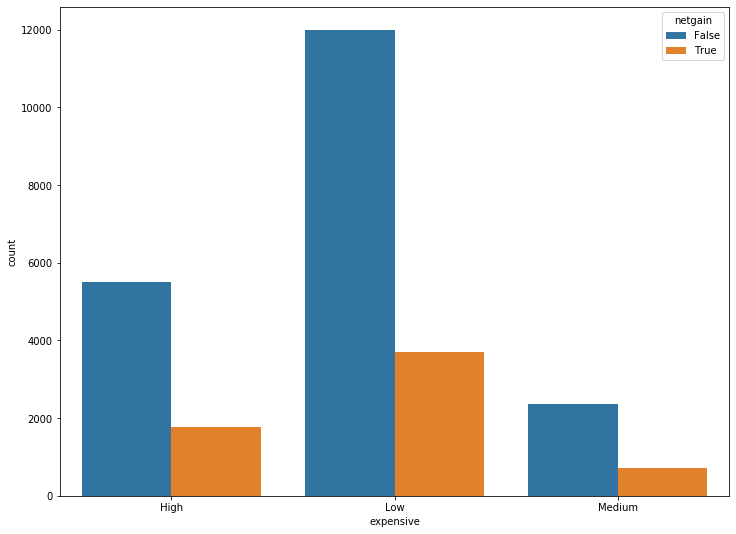

In [86]:
fig = plt.figure(figsize=[12,9])
sns.countplot(data=df,x='expensive',hue='netgain')

In [87]:
# club high and medium
df.expensive= df['expensive'].apply(lambda x : 'High' if ((x=='High') | (x=='Medium')) else x)

In [88]:
df.expensive.value_counts()

Low     15693
High    10355
Name: expensive, dtype: int64

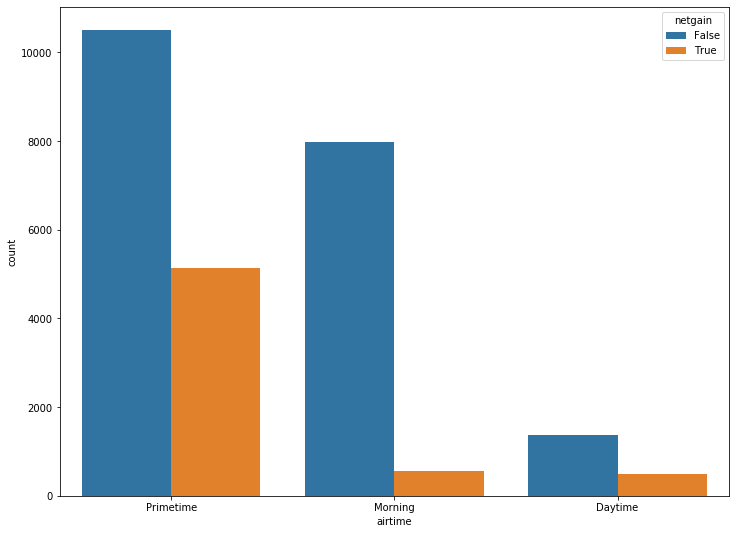

In [89]:
fig = plt.figure(figsize=[12,9])
sns.countplot(data=df,x='airtime',hue='netgain')

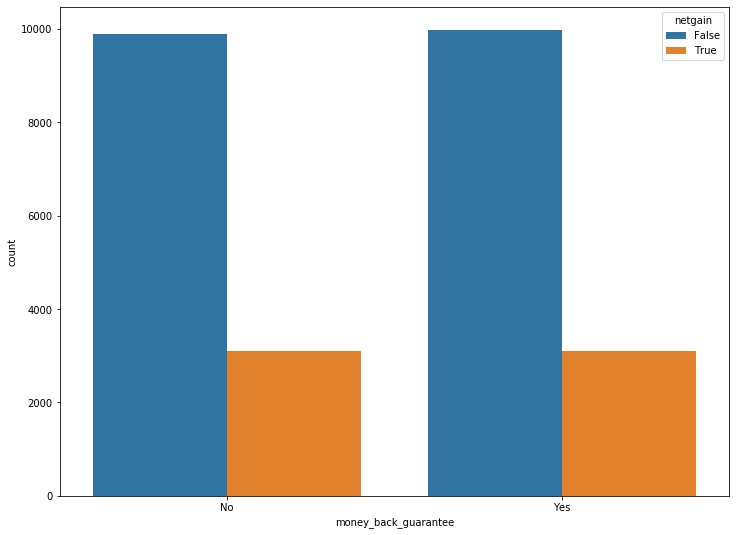

In [90]:
fig = plt.figure(figsize=[12,9])
sns.countplot(data=df,x='money_back_guarantee',hue='netgain')

In [91]:
# df.drop(['id'],axis=1,inplace=True)

In [92]:
df[df.netgain=='True']['average_runtime(minutes_per_week)'].mean()

44.85601291364003

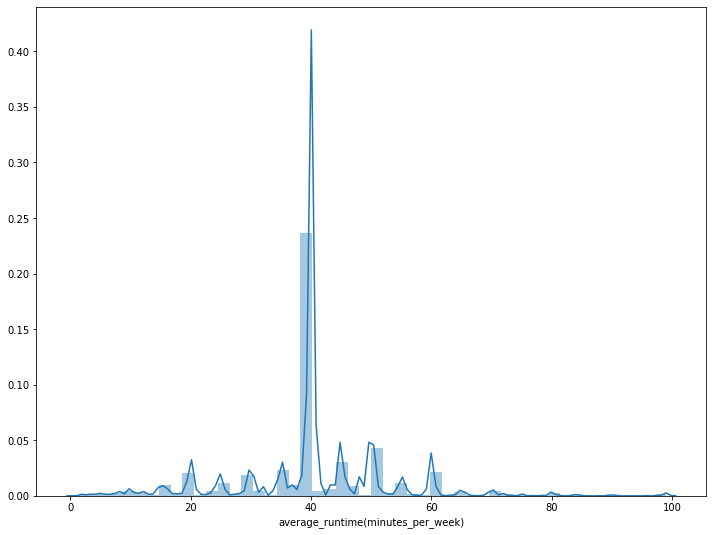

In [93]:
# distribution of avg.runtime column
fig = plt.figure(figsize=[12,9])
sns.distplot(df['average_runtime(minutes_per_week)'])

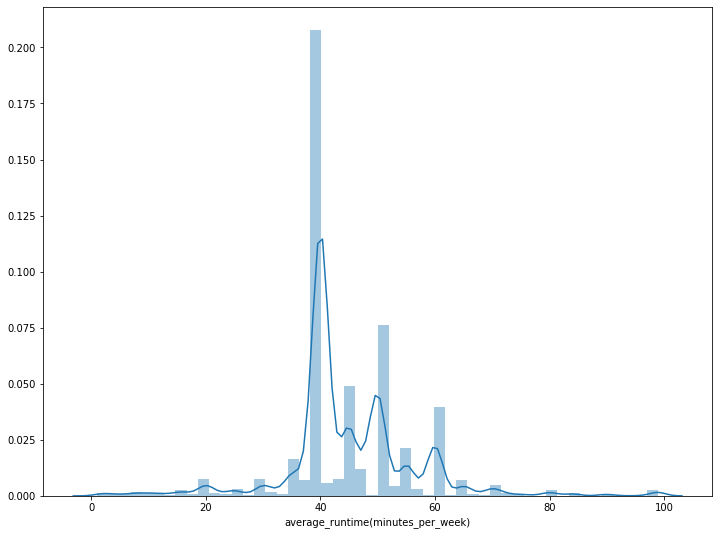

In [94]:
fig = plt.figure(figsize=[12,9])
sns.distplot(df[df.netgain=='True']['average_runtime(minutes_per_week)'])

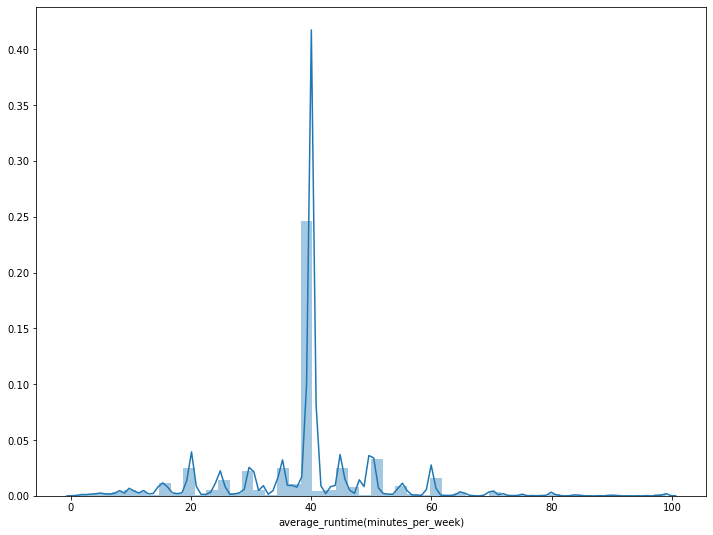

In [95]:
fig = plt.figure(figsize=[12,9])
sns.distplot(df[df.netgain=='False']['average_runtime(minutes_per_week)'])

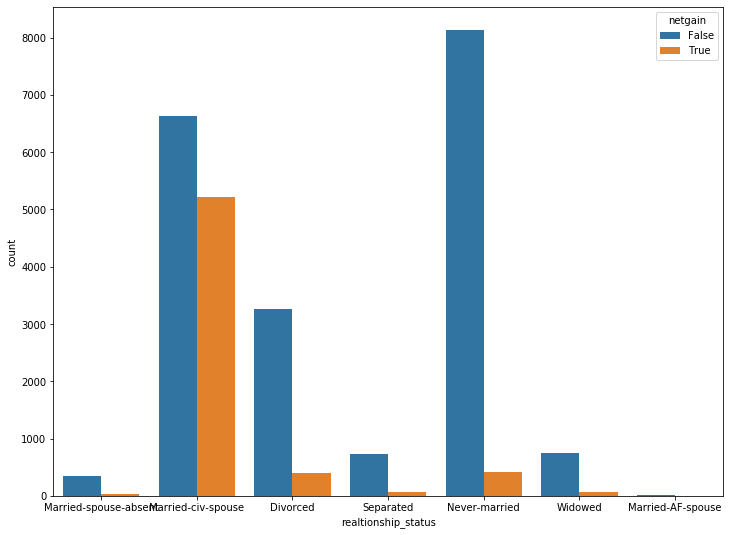

In [96]:
fig,ax = plt.subplots(figsize=(12,9))
sns.countplot(data=df,x='realtionship_status',hue='netgain')

In [97]:
# club Separated and widowed
df.realtionship_status= df['realtionship_status'].apply(lambda x : 'Sep_Wid' if ((x=='Separated') | (x=='Widowed')) else x )

In [98]:
df.realtionship_status.value_counts()

Married-civ-spouse       11844
Never-married             8547
Divorced                  3649
Sep_Wid                   1611
Married-spouse-absent      378
Married-AF-spouse           19
Name: realtionship_status, dtype: int64

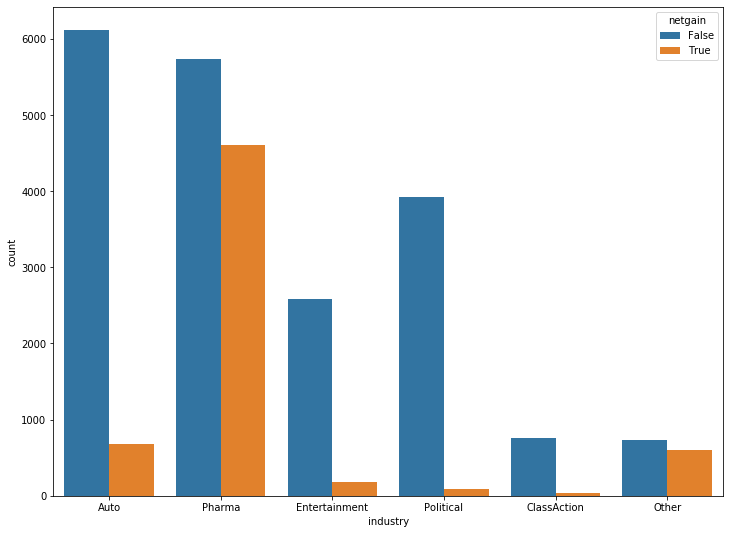

In [99]:
fig,ax = plt.subplots(figsize=(12,9))
sns.countplot(data=df,x='industry',hue='netgain')

In [100]:
# club auto and entertainment
df.industry= df['industry'].apply(lambda x : 'auto_entmnt' if ((x=='Auto') | (x=='Entertainment')) else x)

In [101]:
df.industry.value_counts()

Pharma         10339
auto_entmnt     9566
Political       4014
Other           1333
ClassAction      796
Name: industry, dtype: int64

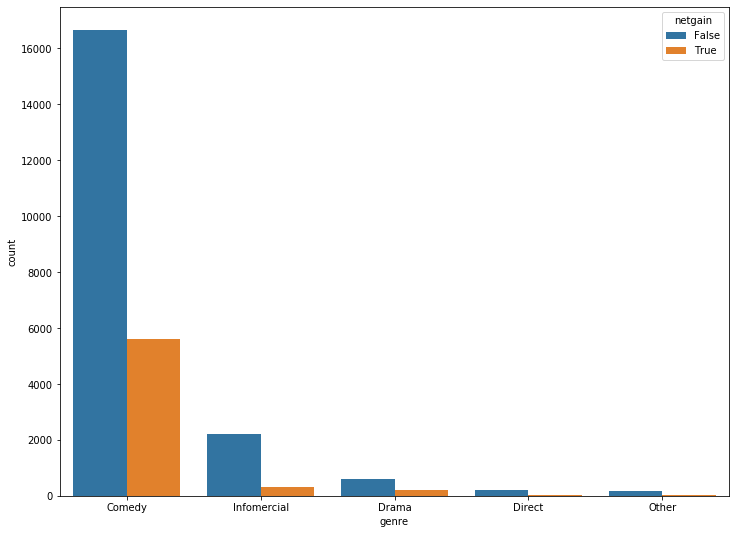

In [102]:
fig,ax = plt.subplots(figsize=(12,9))
sns.countplot(data=df,x='genre',hue='netgain')

In [103]:
# club direct and other
df.genre= df['genre'].apply(lambda x : 'dir_oth' if ((x=='Direct') | (x=='Other')) else x )

In [104]:
df.genre.value_counts()

Comedy         22258
Infomercial     2516
Drama            803
dir_oth          471
Name: genre, dtype: int64

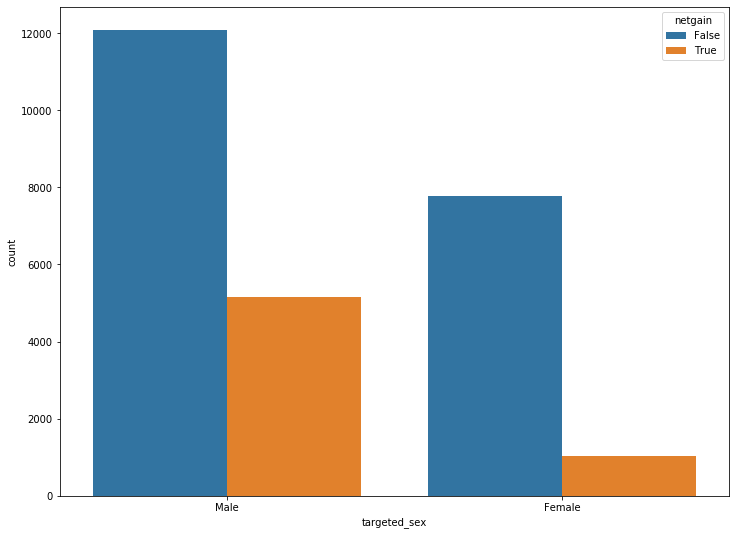

In [105]:
fig,ax = plt.subplots(figsize=(12,9))
sns.countplot(data=df,x='targeted_sex',hue='netgain')

In [106]:
df.airlocation.value_counts()

United-States                 23250
Mexico                          523
International                   465
Philippines                     141
Germany                         114
Canada                           94
Cuba                             86
Puerto-Rico                      85
El-Salvador                      84
India                            81
England                          79
Italy                            70
South                            69
Poland                           66
Jamaica                          63
Dominican-Republic               62
Guatemala                        61
Vietnam                          57
Columbia                         55
Japan                            54
China                            53
Taiwan                           37
Iran                             36
Haiti                            35
Ecuador                          31
Portugal                         30
Peru                             28
Nicaragua                   

In [107]:
df.airlocation = df.airlocation.apply(lambda x : x if x in ['United-States','Mexico','International'] else 'others')

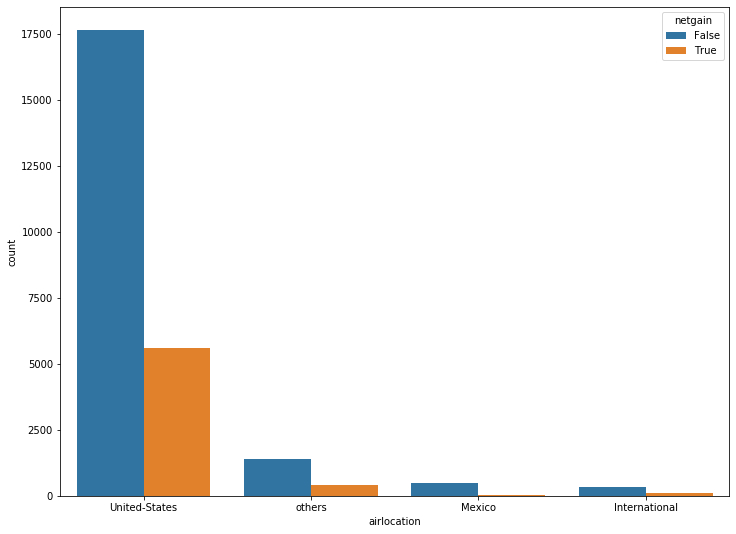

In [108]:
fig,ax = plt.subplots(figsize=(12,9))
sns.countplot(data=df,x='airlocation',hue='netgain')

In [109]:
# # club direct and other
# df.genre= df['genre'].apply(lambda x : 'dir_oth' if ((x=='Direct') | (x=='Other')) else x )
# # club auto and entertainment
# df.industry= df['industry'].apply(lambda x : 'auto_entmnt' if ((x=='Auto') | (x=='Entertainment')) else x )
# # club Separated and widowed
# df.realtionship_status= df['realtionship_status'].apply(lambda x : 'Sep_Wid' if ((x=='Separated') | (x=='Widowed')) else x )
# # club high and medium
# df.expensive= df['expensive'].apply(lambda x : 'High' if ((x=='High') | (x=='Medium')) else x )

In [110]:
df.columns

Index(['id', 'realtionship_status', 'industry', 'genre', 'targeted_sex',
       'average_runtime(minutes_per_week)', 'airtime', 'airlocation',
       'ratings', 'expensive', 'money_back_guarantee', 'netgain'],
      dtype='object')

In [111]:
df.drop(columns=['id'],axis=1,inplace=True)

In [112]:
# df['netgain']=df['netgain'].replace({'True':1,'False':0})

In [113]:
# X=df[[a for a in df.columns if a not in ['netgain']]]
# y = df['netgain']

In [114]:
# from sklearn.model_selection import train_test_split
# X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

In [115]:
# # implementing catboost
# ! pip install catboost

In [116]:
# df.columns

In [117]:
# cat_features=[0,1,2,3,5,6,8,9]

In [118]:
# from catboost import CatBoostClassifier

# clf = CatBoostClassifier(
#     iterations=5, 
#     learning_rate=0.1, 
#     #loss_function='CrossEntropy'
# )

In [119]:
# # from catboost import CatBoostClassifier

# # clf = CatBoostClassifier(
# #     iterations=5, 
# #     learning_rate=0.1, 
# #     #loss_function='CrossEntropy'
# # )


# clf.fit(X_train, y_train, 
#         cat_features=cat_features, 
#         eval_set=(X_train, y_train), 
#         verbose=False
# )

# print('CatBoost model is fitted: ' + str(clf.is_fitted()))
# print('CatBoost model parameters:')
# print(clf.get_params())


In [120]:
# # making prediction on the test dataset
# y_pred_2=clf.predict(X_test)

# # checking the metric scores
# print(f"Confusion_matrix: {confusion_matrix(y_test,y_pred_2)}")
# print(f"Accuracy: {accuracy_score(y_test,y_pred_2)}")
# print(f"roc_auc_score: {roc_auc_score(y_test,y_pred_2)}")

In [121]:
df=pd.get_dummies(df,columns=['realtionship_status', 'industry', 'genre', 'targeted_sex','airtime','airlocation',
                              'expensive', 'money_back_guarantee'],drop_first=True)

df['netgain']=df['netgain'].replace({'True':1,'False':0})

In [122]:
df.head()

,average_runtime(minutes_per_week),ratings,netgain,realtionship_status_Married-AF-spouse,realtionship_status_Married-civ-spouse,realtionship_status_Married-spouse-absent,realtionship_status_Never-married,realtionship_status_Sep_Wid,industry_Other,industry_Pharma,...,genre_Infomercial,genre_dir_oth,targeted_sex_Male,airtime_Morning,airtime_Primetime,airlocation_Mexico,airlocation_United-States,airlocation_others,expensive_Low,money_back_guarantee_Yes
0,45,0.027465,0,0,0,1,0,0,0,0,...,0,0,1,0,1,0,1,0,0,0
1,45,0.027465,0,0,1,0,0,0,0,1,...,0,0,1,0,1,0,1,0,1,0
2,45,0.027465,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,1,0,0,1
3,40,0.027465,0,0,0,0,0,1,0,0,...,1,0,0,0,1,0,1,0,1,0
4,48,0.027465,1,0,1,0,0,0,0,1,...,0,0,1,0,1,0,1,0,0,0


In [123]:
X_1=df[[a for a in df.columns if a not in ['netgain']]]
y_1 = df['netgain']

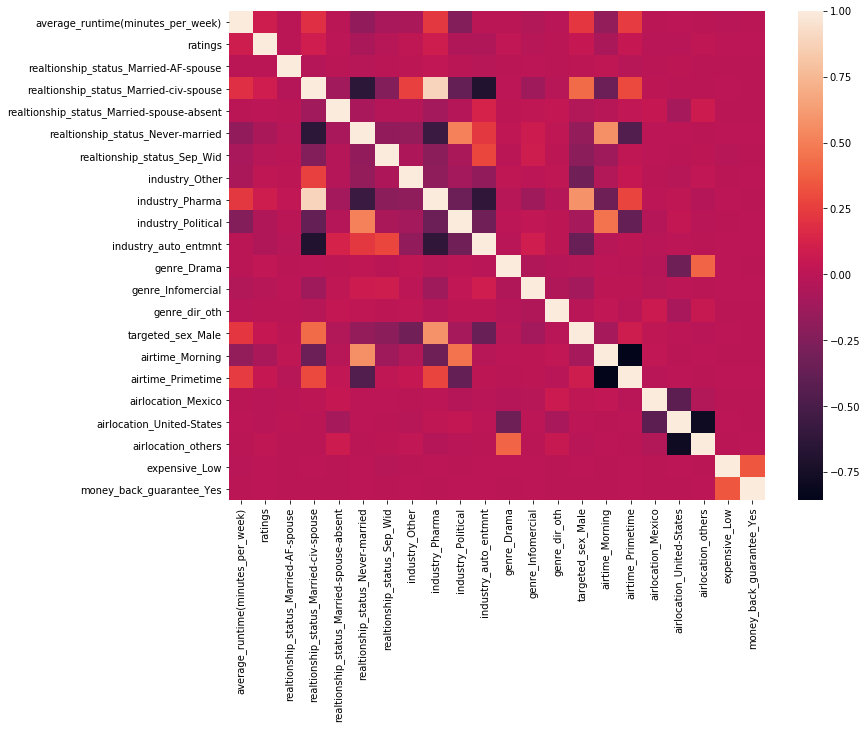

In [124]:
# using correlation matrix to identify the most correlated features
fig,ax=plt.subplots(figsize=(12,9))
sns.heatmap(X_1.corr(), ax=ax)

In [125]:
# # using VIF to identify the correlated features
# from statsmodels.stats.outliers_influence import variance_inflation_factor
# vif=pd.DataFrame()
# vif['features']=X_1.columns

# vif['vif_value'] = [variance_inflation_factor(X_1.values,i) for i in range(len(X_1.columns))]

# vif.head()

In [126]:
# vif[vif['vif_value']>10]

In [127]:
# # dropping columns with very high vif_values
# X_1.drop(columns=vif[vif['vif_value']>10].features.values,axis=1,inplace=True)
# #X_1.drop(columns = ['id'],axis=1, inplace=True)

In [128]:
df.shape

(26048, 23)

In [129]:
X_1

,average_runtime(minutes_per_week),ratings,realtionship_status_Married-AF-spouse,realtionship_status_Married-civ-spouse,realtionship_status_Married-spouse-absent,realtionship_status_Never-married,realtionship_status_Sep_Wid,industry_Other,industry_Pharma,industry_Political,...,genre_Infomercial,genre_dir_oth,targeted_sex_Male,airtime_Morning,airtime_Primetime,airlocation_Mexico,airlocation_United-States,airlocation_others,expensive_Low,money_back_guarantee_Yes
0,45,0.027465,0,0,1,0,0,0,0,0,...,0,0,1,0,1,0,1,0,0,0
1,45,0.027465,0,1,0,0,0,0,1,0,...,0,0,1,0,1,0,1,0,1,0
2,45,0.027465,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,1,0,0,1
3,40,0.027465,0,0,0,0,1,0,0,1,...,1,0,0,0,1,0,1,0,1,0
4,48,0.027465,0,1,0,0,0,0,1,0,...,0,0,1,0,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26043,50,0.027465,0,1,0,0,0,0,1,0,...,0,0,1,0,1,0,1,0,1,0
26044,40,0.027465,0,0,0,1,0,0,0,0,...,0,0,0,1,0,0,1,0,1,0
26045,25,0.102234,0,1,0,0,0,1,0,0,...,0,0,0,0,1,0,1,0,1,0
26046,48,0.027465,0,0,0,1,0,0,0,0,...,0,0,0,1,0,0,1,0,1,1


In [130]:
X_1.columns

Index(['average_runtime(minutes_per_week)', 'ratings',
       'realtionship_status_Married-AF-spouse',
       'realtionship_status_Married-civ-spouse',
       'realtionship_status_Married-spouse-absent',
       'realtionship_status_Never-married', 'realtionship_status_Sep_Wid',
       'industry_Other', 'industry_Pharma', 'industry_Political',
       'industry_auto_entmnt', 'genre_Drama', 'genre_Infomercial',
       'genre_dir_oth', 'targeted_sex_Male', 'airtime_Morning',
       'airtime_Primetime', 'airlocation_Mexico', 'airlocation_United-States',
       'airlocation_others', 'expensive_Low', 'money_back_guarantee_Yes'],
      dtype='object')

In [131]:
y_1

0        0
1        0
2        0
3        0
4        1
        ..
26043    1
26044    0
26045    1
26046    0
26047    0
Name: netgain, Length: 26048, dtype: int64

In [132]:
# df1=df[['realtionship_status','average_runtime(minutes_per_week)']].groupby('realtionship_status').agg({'average_runtime(minutes_per_week)':'mean'})

In [133]:
# # convert the dependent variable in the numerical form
# y_1=y.replace({'True':1,'False':0})
# y_1.head()

In [134]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X_1,y_1,test_size=0.2)

In [135]:
X_train

,average_runtime(minutes_per_week),ratings,realtionship_status_Married-AF-spouse,realtionship_status_Married-civ-spouse,realtionship_status_Married-spouse-absent,realtionship_status_Never-married,realtionship_status_Sep_Wid,industry_Other,industry_Pharma,industry_Political,...,genre_Infomercial,genre_dir_oth,targeted_sex_Male,airtime_Morning,airtime_Primetime,airlocation_Mexico,airlocation_United-States,airlocation_others,expensive_Low,money_back_guarantee_Yes
11142,43,0.027465,0,0,0,1,0,0,0,1,...,0,0,0,0,1,0,1,0,1,1
1865,40,0.129776,0,0,0,1,0,0,0,0,...,0,0,1,0,1,0,1,0,0,0
11879,40,0.027465,0,0,0,1,0,0,0,0,...,0,0,1,0,1,0,1,0,1,0
7640,30,0.027465,0,0,0,1,0,0,0,0,...,0,0,0,1,0,0,1,0,1,1
11482,40,0.027465,0,0,0,0,0,0,0,0,...,1,0,0,0,1,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19359,15,0.027465,0,0,0,1,0,0,0,1,...,0,0,1,1,0,0,1,0,0,0
21017,40,0.027465,0,0,0,1,0,0,0,1,...,0,0,0,0,1,0,1,0,0,0
23317,40,0.027465,0,1,0,0,0,0,1,0,...,0,0,1,0,1,0,1,0,1,1
3013,40,0.027465,0,1,0,0,0,0,1,0,...,1,0,1,0,1,0,1,0,1,1


In [136]:
y_train.value_counts()

0    15890
1     4948
Name: netgain, dtype: int64

In [137]:
# normalizing the train dataset
from sklearn.preprocessing import StandardScaler
std_scl=StandardScaler()
X_train=std_scl.fit_transform(X_train)

In [138]:
X_train.shape

(20838, 22)

In [139]:
# sts_scl_y=StandardScaler()
# y_train=sts_scl_y.fit_transform(y_1)

In [140]:
# normalizing the test dataset
X_test=std_scl.transform(X_test)

In [141]:
import statsmodels.api as sm
classifier_0 = sm.Logit(y_train,X_train).fit()
#result = model.fit()
#print(result.summary())

# making predictions on the test data
#y_pred_0=classifier_0.predict(X_test)

Optimization terminated successfully.
         Current function value: 0.471442
         Iterations 8


In [142]:
classifier_0.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                netgain   No. Observations:                20838
Model:                          Logit   Df Residuals:                    20816
Method:                           MLE   Df Model:                           21
Date:                Sat, 28 May 2022   Pseudo R-squ.:                  0.1399
Time:                        01:23:18   Log-Likelihood:                -9823.9
converged:                       True   LL-Null:                       -11422.
Covariance Type:            nonrobust   LLR p-value:                     0.000
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.2342      0.019     12.034      0.000       0.196       0.272
x2             7.5712      0.126     60.155      0.000       7.325       7.818
x3             0.0087      0.017      0.521      0.603      -0.024       0.041
x4            -0.0590      0.139     -0.423      0.672      -0.332       0.214
x5            -0.0002      0.022     -0.011      0.991      -0.043       0.042
x6             0.0677      0.034      2.016      0.044       0.002       0.134
x7            -0.0006      0.024     -0.024      0.981      -0.048       0.046
x8             0.4287      0.063      6.818      0.000       0.305       0.552
x9             0.7386      0.135      5.458      0.000       0.473       1.004
x10           -0.0426      0.050     -0.852      0.394      -0.141       0.055
x11           -0.0598      0.063     -0.944      0.345      -0.184       0.064
x12            0.0176      0.019      0.907      0.364      -0.020       0.055
x13           -0.1127      0.020     -5.680      0.000      -0.152      -0.074
x14           -0.0260      0.019     -1.380      0.167      -0.063       0.011
x15            0.0724      0.028      2.629      0.009       0.018       0.126
x16           -0.1729      0.038     -4.494      0.000      -0.248      -0.097
x17            0.1920      0.035      5.462      0.000       0.123       0.261
x18           -0.1385      0.028     -4.996      0.000      -0.193      -0.084
x19           -0.0095      0.041     -0.229      0.819      -0.091       0.072
x20           -0.0336      0.038     -0.883      0.377      -0.108       0.041
x21           -0.0106      0.019     -0.564      0.573      -0.047       0.026
x22            0.0055      0.019      0.293      0.770      -0.031       0.042
==============================================================================
"""

In [143]:
a=classifier_0.summary()

In [144]:
df_summary = pd.DataFrame(a.tables[1])
df_summary=df_summary[~(df_summary.index==0)]
df_summary.columns = ['col_name','coeff','error','z_value','p_value','lower_limit','upper_limit']
df_summary.head()

,col_name,coeff,error,z_value,p_value,lower_limit,upper_limit
1,x1,0.2342,0.019,12.034,0.000,0.196,0.272
2,x2,7.5712,0.126,60.155,0.000,7.325,7.818
3,x3,0.0087,0.017,0.521,0.603,-0.024,0.041
4,x4,-0.0590,0.139,-0.423,0.672,-0.332,0.214
5,x5,-0.0002,0.022,-0.011,0.991,-0.043,0.042


In [145]:
df_summary['col_name']=X_1.columns
df_summary.head()

,col_name,coeff,error,z_value,p_value,lower_limit,upper_limit
1,average_runtime(minutes_per_week),0.2342,0.019,12.034,0.000,0.196,0.272
2,ratings,7.5712,0.126,60.155,0.000,7.325,7.818
3,realtionship_status_Married-AF-spouse,0.0087,0.017,0.521,0.603,-0.024,0.041
4,realtionship_status_Married-civ-spouse,-0.0590,0.139,-0.423,0.672,-0.332,0.214
5,realtionship_status_Married-spouse-absent,-0.0002,0.022,-0.011,0.991,-0.043,0.042


In [146]:
df_summary['p_value'].iloc[0]

In [147]:
# remove_columns = df_summary[df_summary['p_value']>0.2]['col_name']

In [148]:
# y_pred_0

In [149]:
a=classifier_0.summary()

In [150]:
#accuracy_score(y_test,y_pred_0)

In [151]:
# running the model
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state=0)
classifier.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [152]:
y_pred=classifier.predict(X_test)

In [153]:
from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score
a= confusion_matrix(y_test,y_pred)
print(a)

[[3770  193]
 [ 831  416]]


In [154]:
b=accuracy_score(y_test,y_pred)
print(b)

0.8034548944337812


In [155]:
c= roc_auc_score(y_test,y_pred)
print(c)

0.6424500810524618


In [156]:
# random forest classifier
from sklearn.ensemble import RandomForestClassifier
classifier_2 = RandomForestClassifier()
#classifier_2.fit(X_train,y_train)

In [157]:
params = {'n_estimators':[10,15,20,25,50,75,100,125,150],
         'max_depth':[5,8,10,12,15],
         'max_features':['auto','log2']}

grid_cv = GridSearchCV(classifier_2,param_grid=params,cv=5,return_train_score=True,scoring='accuracy')

grid_cv.fit(X_train,y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              rando

In [158]:
grid_cv.best_params_

{'max_depth': 10, 'max_features': 'log2', 'n_estimators': 10}

In [159]:
classifier_2 = RandomForestClassifier(max_depth=10, n_estimators= 50)
classifier_2.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=10, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=50,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [160]:
# making prediction on the test dataset
y_pred_2=classifier_2.predict(X_test)

# checking the metric scores
print(f"Confusion_matrix: {confusion_matrix(y_test,y_pred_2)}")
print(f"Accuracy: {accuracy_score(y_test,y_pred_2)}")
print(f"roc_auc_score: {roc_auc_score(y_test,y_pred_2)}")

Confusion_matrix: [[3738  225]
 [ 730  517]]
Accuracy: 0.8166986564299424
roc_auc_score: 0.6789099288709253


In [161]:
# # making prediction on the test dataset
# y_pred_2=classifier_2.predict(X_train)

# # checking the metric scores
# print(f"Confusion_matrix: {confusion_matrix(y_train,y_pred_2)}")
# print(f"Accuracy: {accuracy_score(y_train,y_pred_2)}")
# print(f"roc_auc_score: {roc_auc_score(y_train,y_pred_2)}")

Confusion_matrix: [[14990   900]
 [ 2755  2193]]
Accuracy: 0.8245992897590939
roc_auc_score: 0.6932849908399145


### Implementing lightGBM 

In [365]:
! pip install lightgbm

     |████████████████████████████████| 2.0 MB 5.0 MB/s eta 0:00:01


In [163]:
import lightgbm as lgb

In [164]:
classifier_2_=lgb.LGBMClassifier()

In [165]:
params = {'n_estimators':[10,15,20,25,50,75,100,125,150],
         'max_depth':[5,8,10,12,15],
         'learning_rate' : [0.05,0.08,0.1,0.15,0.2]}

grid_cv_lgb = GridSearchCV(classifier_2_,param_grid=params,cv=10,return_train_score=True,scoring='accuracy')

grid_cv_lgb.fit(X_train,y_train)

GridSearchCV(cv=10, error_score=nan,
             estimator=LGBMClassifier(boosting_type='gbdt', class_weight=None,
                                      colsample_bytree=1.0,
                                      importance_type='split',
                                      learning_rate=0.1, max_depth=-1,
                                      min_child_samples=20,
                                      min_child_weight=0.001,
                                      min_split_gain=0.0, n_estimators=100,
                                      n_jobs=-1, num_leaves=31, objective=None,
                                      random_state=None, reg_alpha=0.0,
                                      reg_lambda=0.0, silent='warn',
                                      subsample=1.0, subsample_for_bin=200000,
                                      subsample_freq=0),
             iid='deprecated', n_jobs=None,
             param_grid={'learning_rate': [0.05, 0.08, 0.1, 0.15, 0.2],
                   

In [166]:
grid_cv_lgb.best_params_

{'learning_rate': 0.2, 'max_depth': 5, 'n_estimators': 50}

In [167]:
classifier_2_ = lgb.LGBMClassifier(max_depth=5, n_estimators= 50,learning_rate=0.08)
classifier_2_.fit(X_train,y_train)

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.08, max_depth=5,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=50, n_jobs=-1, num_leaves=31, objective=None,
               random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent='warn',
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

In [168]:
# making prediction on the test dataset
y_pred_2=classifier_2_.predict(X_test)

# checking the metric scores
print(f"Confusion_matrix: {confusion_matrix(y_test,y_pred_2)}")
print(f"Accuracy: {accuracy_score(y_test,y_pred_2)}")
print(f"roc_auc_score: {roc_auc_score(y_test,y_pred_2)}")

Confusion_matrix: [[3722  241]
 [ 699  548]]
Accuracy: 0.8195777351247601
roc_auc_score: 0.6893210877440705


In [574]:
classifier_2_.feature_importances_

array([249,   0,  18,  39,  30,  27,  32,  27,  35,   6,  61,  54,   4,
         1,   1,   3,   7,   1,   8,   4,   0,   4,   0,   5,   1,   0,
         0,   0,   0,   9,   7,   2,   0,   0,   6,   1,   0,  20,   0,
         0,   3,  17,   5,   0,   4,   0,   5,   6,   0,   0,   6,   0,
        63,  82], dtype=int32)

In [575]:
importances = classifier_2_.feature_importances_
#
# Sort the feature importance in descending order
#
sorted_indices = np.argsort(importances)[::-1]

In [576]:
sorted_indices

array([ 0, 53, 52, 10, 11,  3,  8,  6,  4,  5,  7, 37,  2, 41, 29, 18, 30,
       16, 50, 47, 34,  9, 46, 23, 42, 12, 21, 44, 19, 15, 40, 31, 24, 14,
       13, 35, 17,  1, 51, 25, 20, 22, 27, 28, 32, 33, 36, 38, 39, 43, 45,
       48, 49, 26])

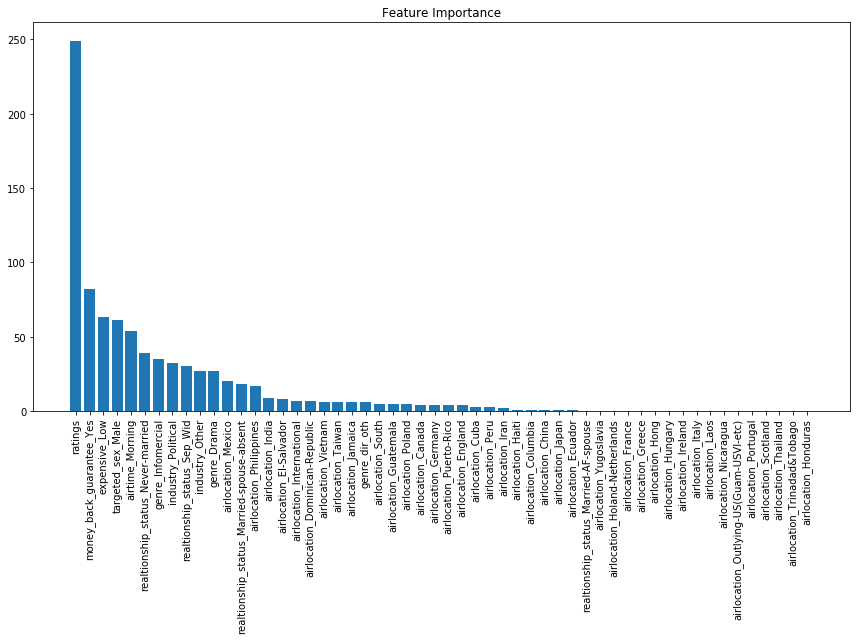

In [577]:

plt.figure(figsize=(12,9))
plt.title('Feature Importance')
plt.bar(range(X_train.shape[1]), importances[sorted_indices], align='center')
plt.xticks(range(X_train.shape[1]), X_1.columns[sorted_indices], rotation=90)
plt.tight_layout()
plt.show()

In [578]:
# selecting the first 15 features with highest feature importance
top_indices=sorted_indices[:10]

top_fts_columns = X_1.columns[top_indices]

In [579]:
top_fts_columns

Index(['ratings', 'money_back_guarantee_Yes', 'expensive_Low',
       'targeted_sex_Male', 'airtime_Morning',
       'realtionship_status_Never-married', 'genre_Infomercial',
       'industry_Political', 'realtionship_status_Sep_Wid', 'industry_Other'],
      dtype='object')

In [580]:
# selecting only the top columns
X_train,X_test,y_train,y_test=train_test_split(X_1[top_fts_columns],y_1,test_size=0.2)

In [581]:
X_train.shape

(20838, 10)

In [582]:
#standardscaling
# normalizing the train dataset
from sklearn.preprocessing import StandardScaler
std_scl=StandardScaler()
X_train=std_scl.fit_transform(X_train)

In [583]:
X_test = std_scl.transform(X_test)

In [584]:
classifier_3_=lgb.LGBMClassifier()

In [585]:
params = {'n_estimators':[10,15,20,25,50,75,100,125,150],
         'max_depth':[5,8,10,12,15],
         'learning_rate' : [0.05,0.08,0.1,0.15,0.2]}

grid_cv_lgb = GridSearchCV(classifier_3_,param_grid=params,cv=10,return_train_score=True,scoring='accuracy')

grid_cv_lgb.fit(X_train,y_train)

GridSearchCV(cv=10, error_score=nan,
             estimator=LGBMClassifier(boosting_type='gbdt', class_weight=None,
                                      colsample_bytree=1.0,
                                      importance_type='split',
                                      learning_rate=0.1, max_depth=-1,
                                      min_child_samples=20,
                                      min_child_weight=0.001,
                                      min_split_gain=0.0, n_estimators=100,
                                      n_jobs=-1, num_leaves=31, objective=None,
                                      random_state=None, reg_alpha=0.0,
                                      reg_lambda=0.0, silent='warn',
                                      subsample=1.0, subsample_for_bin=200000,
                                      subsample_freq=0),
             iid='deprecated', n_jobs=None,
             param_grid={'learning_rate': [0.05, 0.08, 0.1, 0.15, 0.2],
                   

In [586]:
grid_cv_lgb.best_params_

{'learning_rate': 0.05, 'max_depth': 12, 'n_estimators': 125}

In [587]:
classifier_3_ = lgb.LGBMClassifier(max_depth=12, n_estimators= 125,learning_rate=0.05)
classifier_3_.fit(X_train,y_train)

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.05, max_depth=12,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=125, n_jobs=-1, num_leaves=31, objective=None,
               random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent='warn',
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

In [588]:
# making prediction on the test dataset
y_pred_2=classifier_3_.predict(X_test)

# checking the metric scores
print(f"Confusion_matrix: {confusion_matrix(y_test,y_pred_2)}")
print(f"Accuracy: {accuracy_score(y_test,y_pred_2)}")
print(f"roc_auc_score: {roc_auc_score(y_test,y_pred_2)}")

Confusion_matrix: [[3967   14]
 [ 985  244]]
Accuracy: 0.8082533589251439
roc_auc_score: 0.5975093451420692


In [253]:
classifier_3 = RandomForestClassifier()

In [254]:
params = {'n_estimators':[10,15,20,25,50,75,100,125],
         'max_depth':[5,8,10,12,15],
         'max_features':['auto','log2']}

grid_cv = GridSearchCV(classifier_2,param_grid=params,cv=3,return_train_score=True)

grid_cv.fit(X_train,y_train)

GridSearchCV(cv=3, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=12,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=75, n_jobs=None,
                                              oob_score=False,
                                              random_s

In [255]:
grid_cv.best_params_

{'max_depth': 8, 'max_features': 'log2', 'n_estimators': 15}

In [352]:
#Rerunning the randomforestclassifier model
classifier_3 = RandomForestClassifier(max_depth=10,max_features='auto', n_estimators= 75)
classifier_3.fit(X_train,y_train)

# making prediction on the test dataset
y_pred_3=classifier_3.predict(X_test)

# checking the metric scores
print(f"Confusion_matrix: {confusion_matrix(y_test,y_pred_3)}")
print(f"Accuracy: {accuracy_score(y_test,y_pred_3)}")
print(f"roc_auc_score: {roc_auc_score(y_test,y_pred_3)}")

Confusion_matrix: [[3959   10]
 [ 995  246]]
Accuracy: 0.8071017274472169
roc_auc_score: 0.5978538548854346


In [169]:
# testing the solution on the test set
test_df = pd.read_csv('Test.csv')

In [170]:
test_df.head()

,id,realtionship_status,industry,genre,targeted_sex,average_runtime(minutes_per_week),airtime,airlocation,ratings,expensive,money_back_guarantee
0,1,Widowed,Auto,Comedy,Female,10,Daytime,United-States,0.027465,Low,No
1,4,Married-civ-spouse,Pharma,Comedy,Male,40,Morning,United-States,0.056262,High,Yes
2,5,Divorced,Entertainment,Comedy,Female,50,Morning,United-States,0.027465,Low,No
3,9,Married-civ-spouse,Pharma,Infomercial,Male,40,Primetime,United-States,0.027465,Low,No
4,10,Married-civ-spouse,Pharma,Comedy,Male,40,Primetime,United-States,0.027465,Low,Yes


In [171]:
# club direct and other
test_df.genre= test_df['genre'].apply(lambda x : 'dir_oth' if ((x=='Direct') | (x=='Other')) else x )
# club auto and entertainment
test_df.industry= test_df['industry'].apply(lambda x : 'auto_entmnt' if ((x=='Auto') | (x=='Entertainment')) else x )
# club Separated and widowed
test_df.realtionship_status= test_df['realtionship_status'].apply(lambda x : 'Sep_Wid' if ((x=='Separated') | (x=='Widowed')) else x )
# club high and medium
test_df.expensive= test_df['expensive'].apply(lambda x : 'High' if ((x=='High') | (x=='Medium')) else x )

test_df.airlocation = test_df.airlocation.apply(lambda x : x if x in ['United-States','Mexico','International'] else 'others')

In [172]:
df_test=pd.get_dummies(test_df,columns=['realtionship_status', 'industry', 'genre', 'targeted_sex','airtime','airlocation',
                              'expensive', 'money_back_guarantee'],drop_first=True)

# df_test['netgain']=df_test['netgain'].replace({'True':1,'False':0})

In [173]:
df_test.drop(columns=['id'],axis=1,inplace=True)
df_test.shape

(6513, 22)

In [878]:
# # dropping columns with very high vif_values
# df_test.drop(columns=vif[vif['vif_value']>10].features.values,axis=1,inplace=True)
# #X_1.drop(columns = ['id'],axis=1, inplace=True)

In [174]:
df_test.shape

(6513, 22)

In [175]:
set(X_1.columns)-set(df_test.columns)

set()

In [437]:
df_test=df_test[top_fts_columns]
df_test.shape

(6513, 25)

In [176]:
df_test = std_scl.transform(df_test)

In [177]:
y_pred_test=classifier_2_.predict(df_test)
y_pred_test

array([0, 0, 0, ..., 0, 0, 0])

In [885]:
list(y_pred_test)

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,


In [178]:
# creating the fina df
final_df = pd.DataFrame({'id' : test_df['id'], 'netgain':y_pred_test})

In [179]:
final_df['netgain'].replace({0:'False',1:'True'},inplace=True)

In [180]:
final_df

,id,netgain
0,1,False
1,4,False
2,5,False
3,9,False
4,10,False
...,...,...
6508,32538,False
6509,32542,False
6510,32549,False
6511,32558,False


In [181]:
final_df.to_csv('result.csv',index=False)